### **Dummy Linear Regression made by hand** 
using pytorch libraries




In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

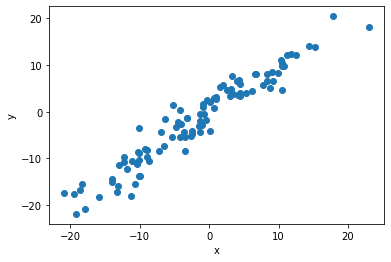

In [2]:

X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')


In [3]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [4]:

torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())


In [6]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

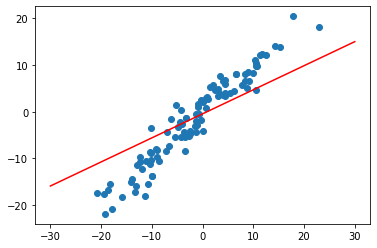

In [7]:
plot_fit('Initial Model')

In [8]:

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [9]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 24.908376693725586
epoch: 1 loss: 16.889249801635742
epoch: 2 loss: 12.387520790100098
epoch: 3 loss: 9.859166145324707
epoch: 4 loss: 8.437989234924316
epoch: 5 loss: 7.638042449951172
epoch: 6 loss: 7.186708927154541
epoch: 7 loss: 6.931046009063721
epoch: 8 loss: 6.785244941711426
epoch: 9 loss: 6.701168060302734
epoch: 10 loss: 6.651806831359863
epoch: 11 loss: 6.622005462646484
epoch: 12 loss: 6.6032562255859375
epoch: 13 loss: 6.590785503387451
epoch: 14 loss: 6.581911563873291
epoch: 15 loss: 6.575127124786377
epoch: 16 loss: 6.569583892822266
epoch: 17 loss: 6.564803600311279
epoch: 18 loss: 6.5605149269104
epoch: 19 loss: 6.5565643310546875
epoch: 20 loss: 6.552860260009766
epoch: 21 loss: 6.549352645874023
epoch: 22 loss: 6.546009540557861
epoch: 23 loss: 6.542812347412109
epoch: 24 loss: 6.5397467613220215
epoch: 25 loss: 6.536802768707275
epoch: 26 loss: 6.533975601196289
epoch: 27 loss: 6.531257152557373
epoch: 28 loss: 6.528643608093262
epoch: 29 loss: 6.52

Text(0, 0.5, 'epochs')

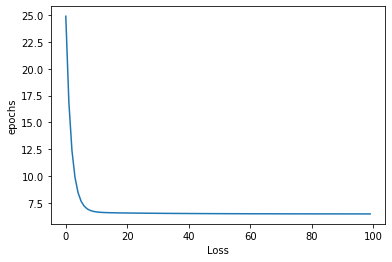

In [11]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epochs')

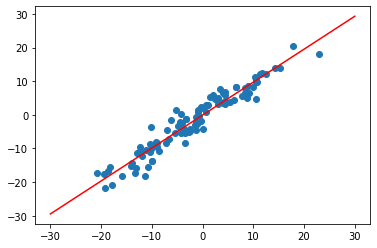

In [12]:
plot_fit("Trained Model")